In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import sys
import os
import torch
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '../')
from func import ipfread,negsample


In [44]:
steel="780"
file=open(steel+".txt","r")
# file=open("1180.txt")
ret=[]
app=[]
for ele in file.read().split("\n"):
    if ele=="":
        ret.append(app)
        app=[]
    else:
        app.append(ele)
ret.append(app)
while [] in ret:
    ret.remove([])
ret_=[]
app=[]
name=[]
for i in range(len(ret)):
    name.append(ret[i][0])
    ret[i].remove(ret[i][0])
    app=[]
    for j in range(len(ret[i])):
        ret[i][j] = ret[i][j].split(",")
        app.append([500-int(ret[i][j][1])-50,int(ret[i][j][0])])    
#         app.append([int(ret[i][j][1])-50,int(ret[i][j][0])])    
    ret_.append(app)
output=dict()
for i in range(len(ret_)):
    output[name[i]]=ret_[i]
torch.save(output,"../data/"+steel+"_corner.pkl")

20200916
26


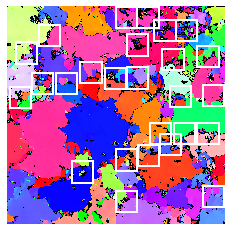

20200923
38


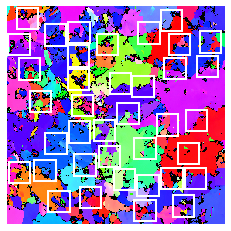

20201019
25


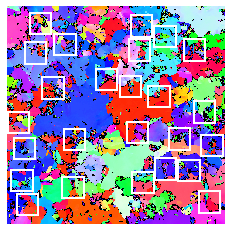

20200907
33


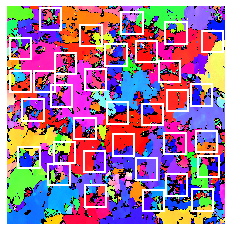

20201109
30


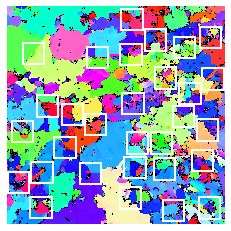

In [45]:
dic=torch.load("../data/%s_corner.pkl"%(steel))
for subset in ["train","val","test"]:
    path="../data/"+steel+"/"+subset+"/"    
    for date in os.listdir(path):
        print(date)
        img = ipfread(path+date+"/before/")[:,:,6:][...,[2,1,0]]
        corner = dic[date]
        fig,ax = plt.subplots(1)
        ax.axis("off")
        ax.imshow(img)        
        print(len(corner))
        for i in range(len(corner)):
            sample_y,sample_x = corner[i]
            rect = patches.Rectangle((sample_x,sample_y),49,49,linewidth=2,edgecolor='w',facecolor='none')
            ax.add_patch(rect)
        #     plt.text(sample_x+25, sample_y+25,str(i),color="w")
        plt.savefig("../output/%s_%s.png"%(steel,date),dpi=600,bbox_inches='tight',pad_inches=0)
        plt.show()